<a href="https://colab.research.google.com/github/Mateusz-best-creator/Learning_ML/blob/main/Book_Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)
mnist

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [ ]:
X, y = mnist.data, mnist.target
X.shape, y.shape

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data, title=None):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  if title:
    plt.title(title) # index same as title
  plt.axis("off")

some_digit = X[0]
plot_digit(some_digit, y[0])
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

## Training Binary Classifier

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
y_train_5[:10]

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_5)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=sgd_clf, X=X_train, y=y_train_5, scoring="accuracy", cv=3)

Implement cross-val-score => page 108

## Confusion Matrices

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_predictions = cross_val_predict(estimator=sgd_clf, X=X_train, y=y_train_5, cv=3, verbose=2)
y_train_predictions[:10]

In [ ]:
y_train_predictions, y_train_5

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sgd_cf = confusion_matrix(y_train_5, y_train_predictions)
sgd_cf

In [ ]:
sns.heatmap(sgd_cf, annot=True, fmt=".0f");

## Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

def calculate_metrics(y_train, y_pred):
  precision = precision_score(y_train, y_pred)
  recall = recall_score(y_train, y_pred)
  f1_score = 2 / ((1 / precision) + (1 / recall))
  return {
      "precision": precision,
      "recall": recall,
      "f1": f1_score
  }

In [ ]:
calculate_metrics(y_train_5, y_train_predictions)

## Precision and Recall TradeOff

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf,
                             X_train,
                             y_train_5,
                             cv=3,
                             method="decision_function")

In [ ]:
y_scores.shape

In [ ]:
from matplotlib.pyplot import figure

precision, recall, thresholds = precision_recall_curve(y_true=y_train_5, probas_pred=y_scores)
figure(figsize=(20, 6), dpi=80)
plt.plot(thresholds, precision[:-1], label="precision")
plt.plot(thresholds, recall[:-1], label="recall")
plt.legend()
plt.grid()
plt.title("Precision Recall TradeOff")
plt.show()

In [ ]:
plt.plot(recall, precision, linewidth=2, label="Precision/Recall curve")
plt.grid()
plt.show()

In [ ]:
idx_for_90_precent_precision = (precision >= 90).argmax()
threshold_for_90 = thresholds[idx_for_90_precent_precision]
y_train_pred_90 = (y_scores > threshold_for_90)
calculate_metrics(y_train_5, y_train_pred_90)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0,1],[0,1])
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(rf_clf,
                                    X_train,
                                    y_train_5,
                                    cv=3,
                                    method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_true=y_train_5, probas_pred=y_scores_forest)

plt.plot(recall, precision, linewidth=2, label="SGD")
plt.plot(recall_rf, precision_rf, linewidth=2, label="RandomForest")
plt.grid()
plt.legend()
plt.show()

In [ ]:
y_pred_forest = (y_scores_forest > 0.5)
calculate_metrics(y_train_5, y_pred_forest)

## MultiClass Classification

To classifiy multiple classes:

1. Train 10 binary classifiers, one for each digit (1, non 1 detector etc...), then select the class with the highest score. This is called `One vs Rest` approach: **OvsR**.

2. We can also train binary classifier for every pair of digits: one to distinguihs 0s and 1s, one for 1s and 2s etc... This will require training N * (N - 1) classifiers! For ten classes it means 45 classifiers. This is called `OvsO` one versus one approach.

In [ ]:
from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train[:2000], y_train[:2000])
svc_clf.predict([X_train[0]])

array(['5'], dtype=object)

In [ ]:
svc_clf.decision_function([some_digit])

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(estimator=SVC())
ovr_clf.fit(X_train[:2000], y_train[:2000])
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
cross_val_score(sgd_clf, X_train[:4000], y_train[:4000], cv=3, scoring="accuracy", verbose=2)

[CV] END .................................................... total time=   4.0s
[CV] END .................................................... total time=   3.8s
[CV] END .................................................... total time=   2.8s


array([0.83133433, 0.86196549, 0.86271568])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
cross_val_score(sgd_clf, X_train_scaled[:4000], y_train[:4000], cv=3, scoring="accuracy", verbose=2)

[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   3.3s
[CV] END .................................................... total time=   3.3s


array([0.85007496, 0.88372093, 0.88522131])

## Error Analysis

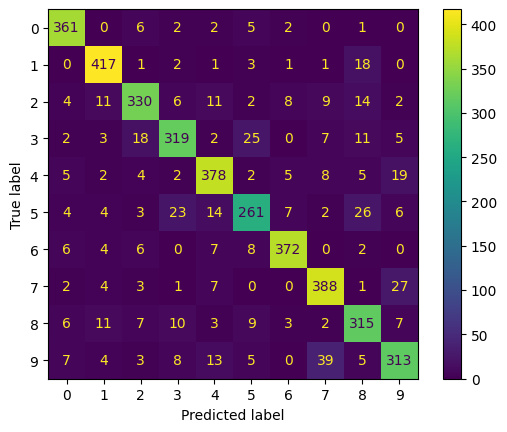

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf,
                                 X_train_scaled[:4000],
                                 y_train[:4000],
                                 cv=2,
                                 verbose=3)
ConfusionMatrixDisplay.from_predictions(y_train[:4000], y_train_pred[:4000])
plt.show()

<Figure size 1200x800 with 0 Axes>

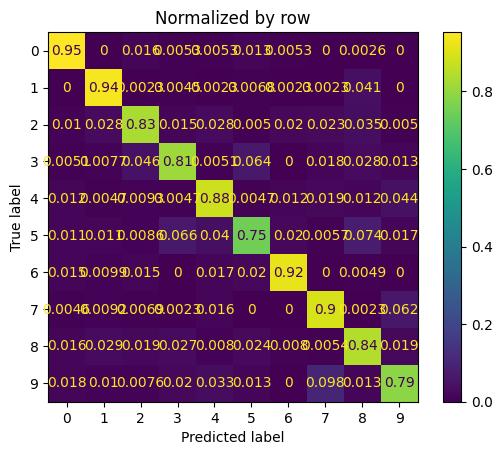

In [ ]:
plt.figure(figsize=(12, 8))
ConfusionMatrixDisplay.from_predictions(y_train[:4000], y_train_pred[:4000], normalize="true")
plt.title("Normalized by row")
plt.show()

## MultiLabel Classification

When we have multiple classes for each instance we are dealing with **multi label** classification.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype("int8") % 2 == 1)
y_multi_label = np.c_[y_train_large, y_train_odd]
y_train_large[:5], y_train_odd[:5], y_multi_label[:5]

(array([False, False, False, False,  True]),
 array([ True, False, False,  True,  True]),
 array([[False,  True],
        [False, False],
        [False, False],
        [False,  True],
        [ True,  True]]))

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multi_label)
knn_clf.predict([some_digit])

array([[False,  True]])

## MultiOutput Classification

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_train), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(X_test_mod[0])
plot_digit(clean_digit)
plt.show()

# Exercises

## Exercise 1

In [2]:
X, y = mnist.data, mnist.target
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
knn_clf = KNeighborsClassifier()
X_train, X_test, y_train, y_test =  X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [ ]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

test_preds = knn_clf.predict(X_test)
accuracy_score(y_test, test_preds)

0.9688

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    "kneighborsclassifier__weights": ["uniform", "distance"],
    "kneighborsclassifier__n_neighbors": [3,4, 5, 8, 15, 20]
}

grid_search = GridSearchCV(estimator=knn_clf,
                           param_grid=grid_param,
                           scoring="accuracy",
                           verbose=2,
                           cv=2)
grid_search.fit(X_train[:40000], y_train[:40000])

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__weights=uniform; total time=  23.9s
[CV] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__weights=uniform; total time=  43.0s
[CV] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__weights=distance; total time=  30.9s
[CV] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__weights=distance; total time=  32.7s
[CV] END kneighborsclassifier__n_neighbors=4, kneighborsclassifier__weights=uniform; total time=  35.5s
[CV] END kneighborsclassifier__n_neighbors=4, kneighborsclassifier__weights=uniform; total time=  26.1s
[CV] END kneighborsclassifier__n_neighbors=4, kneighborsclassifier__weights=distance; total time=  23.4s
[CV] END kneighborsclassifier__n_neighbors=4, kneighborsclassifier__weights=distance; total time=  21.8s
[CV] END kneighborsclassifier__n_neighbors=5, kneighborsclassifier__weights=uniform; total time=  23.3s

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [3, 4, 5, 8, 15,
                                                               20],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='accuracy', verbose=2)

In [ ]:
grid_search.best_params_

{'kneighborsclassifier__n_neighbors': 4,
 'kneighborsclassifier__weights': 'distance'}

In [ ]:
test_preds_best = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, test_preds_best)

0.9439

## Exercise 2

In [19]:
from scipy.ndimage import shift

def rotate_image(original_image, pixel_shift=1):
  rotated_images = []
  image = original_image.reshape(28,28)
  print(f"Shape = {image.shape}")
  for i in range(4):
    img = None
    if i == 0:
      img = shift(image, (0, -pixel_shift))
    elif i == 1:
      img = shift(image, (-pixel_shift, 0))
    elif i == 2:
      img = shift(image, (0, pixel_shift))
    else:
      img = shift(image, (pixel_shift, 0))
    rotated_images.append(img)
  return rotated_images

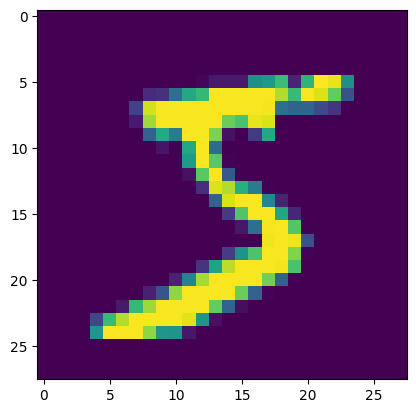

In [20]:
import matplotlib.pyplot as plt

plt.imshow(X[0].reshape(28, 28));

Shape = (28, 28)


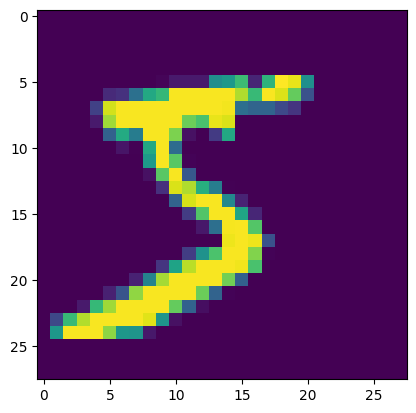

In [23]:
shifted_images = rotate_image(X[0], 3)
plt.imshow(shifted_images[0].reshape(28, 28))

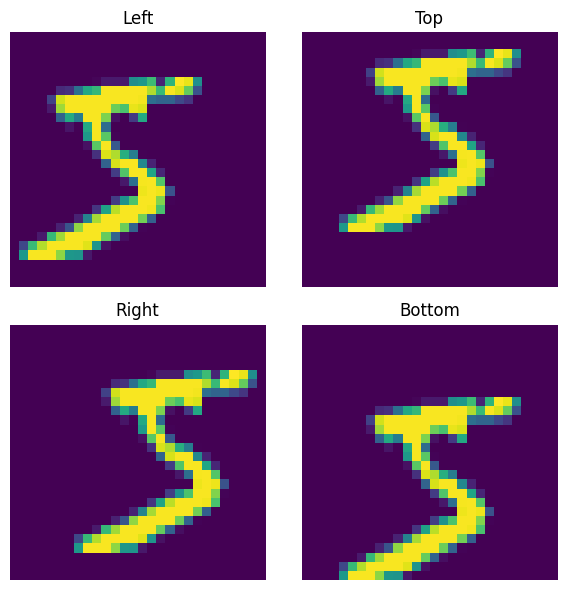

In [28]:
def display_images(img_left, img_top, img_right, img_bottom):
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))

    axs[0, 0].imshow(img_left)
    axs[0, 0].set_title('Left')
    axs[0, 0].axis('off')

    axs[0, 1].imshow(img_top)
    axs[0, 1].set_title('Top')
    axs[0, 1].axis('off')

    axs[1, 0].imshow(img_right)
    axs[1, 0].set_title('Right')
    axs[1, 0].axis('off')

    axs[1, 1].imshow(img_bottom)
    axs[1, 1].set_title('Bottom')
    axs[1, 1].axis("off")
    plt.tight_layout()
    plt.show()

display_images(shifted_images[0], shifted_images[1], shifted_images[2], shifted_images[3])

## Exercise 3

In [31]:
import pandas as pd
train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
len(train_set["Ticket"].unique()), len(train_set["Name"].unique()), len(train_set["Cabin"].unique())

(681, 891, 148)

In [33]:
train_set.set_index("PassengerId", inplace=True)
test_set.set_index("PassengerId", inplace=True)
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# Features like ticket and name are not relevant for our classification
train_set.drop("Name", axis=1, inplace=True)
train_set.drop("Ticket", axis=1, inplace=True)
test_set.drop("Name", axis=1, inplace=True)
test_set.drop("Ticket", axis=1, inplace=True)

In [35]:
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


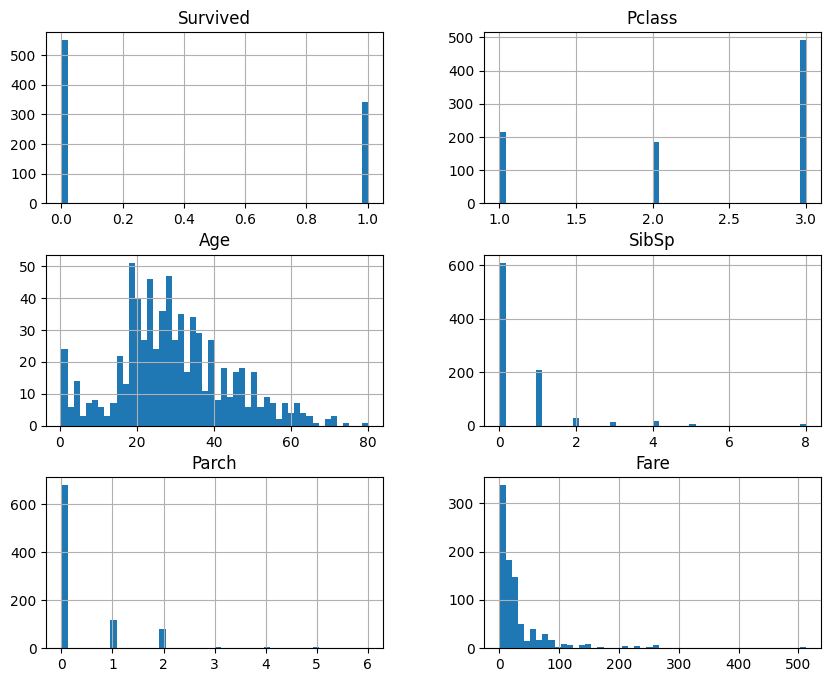

In [36]:
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(10, 8))
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_set.drop("Survived", axis=1), train_set["Survived"], test_size=0.15)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((757, 8), (134, 8), (757,), (134,))

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, StandardScaler
import numpy as np

# Define a small constant to add to the data to avoid log(0)
epsilon = 1e-10
def log_transform(x):
    return np.log(x + epsilon)

# Write all data pipelines
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder())
cat_ordinal_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                                     OrdinalEncoder())
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             StandardScaler())
log_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             FunctionTransformer(func=log_transform, inverse_func=np.exp))

In [41]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([
    ("log", log_pipeline, ["Age", "Fare"]),
    ("num", num_pipeline, ["SibSp", "Parch"]),
    ("cat_ordinal", cat_ordinal_pipeline, ["Cabin"]),
    ("cat", cat_pipeline, ["Sex", "Embarked"])
], remainder="passthrough")

X_train_ready = preprocessing.fit_transform(X_train)
X_valid_ready = preprocessing.fit_transform(X_valid)
pd.DataFrame(X_valid_ready)

,0,1,2,3,4,5,6,7,8,9,10
0,2.890372,2.085672,-0.578555,-0.509444,0.0,0.0,1.0,0.0,0.0,1.0,3.0
1,2.833213,2.351375,-0.578555,-0.509444,0.0,1.0,0.0,0.0,0.0,1.0,2.0
2,3.401197,2.251292,-0.578555,-0.509444,0.0,0.0,1.0,0.0,0.0,1.0,3.0
3,3.135494,2.564949,-0.578555,-0.509444,0.0,0.0,1.0,0.0,0.0,1.0,2.0
4,3.583519,3.184284,0.355498,0.425700,0.0,0.0,1.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
129,3.401197,3.184284,0.355498,0.425700,0.0,1.0,0.0,0.0,0.0,1.0,3.0
130,3.637586,4.382027,-0.578555,-0.509444,4.0,1.0,0.0,0.0,0.0,1.0,1.0
131,3.367296,2.047693,-0.578555,-0.509444,0.0,0.0,1.0,0.0,1.0,0.0,3.0
132,3.091042,1.981001,-0.578555,-0.509444,0.0,0.0,1.0,0.0,0.0,1.0,3.0


In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_ready, y_train)
model_predictions = model.predict(X_valid_ready)

In [43]:
X_valid["Cabin"].isna().sum(), X_train["Cabin"].isna().sum()

(114, 573)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, model_predictions)

0.8731343283582089

In [46]:
test_set

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
892,3,male,34.5,0,0,7.8292,NaN,Q
893,3,female,47.0,1,0,7.0000,NaN,S
894,2,male,62.0,0,0,9.6875,NaN,Q
895,3,male,27.0,0,0,8.6625,NaN,S
896,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,NaN,S
1306,1,female,39.0,0,0,108.9000,C105,C
1307,3,male,38.5,0,0,7.2500,NaN,S


In [47]:
X_test_ready = preprocessing.fit_transform(test_set)

In [49]:
test_predictions = model.predict(X_test_ready)
test_predictions[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0])